---

## Well,

At the [first stage](https://github.com/AlenaSt97/Article_research_v2_-ML-/blob/main/parser.py), I analyzed a little more than **1000 scientific articles** on different **types of blood cells**. I counted all mentioned **cell markers** for each article, as well as the number of mentions to predetermined **cell types** for analysis.  

Let's **import the libraries** for further analysis.

---

In [2]:
import pandas as pd
import sqlite3
from IPython.display import display
pd.options.display.max_columns = None
import numpy as np
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MaxAbsScaler

In [5]:
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

---

Now let's **load tables** containing information about cell markers and cell names **from the SQL database**.

---

In [6]:
original_db=sqlite3.connect('cells_markers.sqlite')

In [7]:
sql_cells='''SELECT * FROM Collect_Cells'''

In [8]:
original_cells_df=pd.read_sql_query(sql_cells,original_db)
original_cells_df

,article_id,Monocyte,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte,Platelet
0,10_3389_fimmu_2022_764557,344,0,0,0,1,0,0,19,1,0
1,10_3389_fimmu_2019_02779,315,0,0,0,3,0,0,37,0,0
2,10_1038_s41598-020-61022-1,274,0,2,0,0,0,0,3,0,0
3,10_1002_JLB_4RI0818-311,362,0,0,0,4,0,0,2,0,0
4,10_1371_journal_ppat_1008361,426,0,0,0,28,0,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1106,10_1128_iai_68_6_3564-3568_2000,0,0,0,0,0,0,0,0,64,0
1107,10_1080_20013078_2020_1743139,0,0,0,0,0,0,0,0,27,27
1108,10_1182_blood-2007-07-099473,0,0,0,0,0,0,0,0,53,0
1109,10_1016_j_pt_2006_02_007,0,0,0,0,0,0,0,0,26,0


In [9]:
sql_markers='''SELECT * FROM Collect_Markers'''

In [10]:
original_markers_df=pd.read_sql_query(sql_markers,original_db)
original_markers_df

,article_id,CD45,CD11B,CD115,CD5276F,CD3825,CD16,CD14,CD3,CD45R,CD64,CD24,CD19,CD72,CD11C,CD4,CD32,CD74,CD62L,CD49D,CD43,CD335,CD80,CD86,CD162,CD56,CD163,CD7,CD36,CD209A,CD135,CD117,CD116,CD8,CD47,CD172A,CD33,CD90,CD103,CD44,CD11A,CD9,CD7C,CD31,CD102,CD300E,CD141,CD15,CD2,CD1C,CD68,CD206,CD40L,CD154,CD147,CD62P,CD41A,CD61,CD18,CD40,CD41,CD20,CD44V,CD83,CD93,CD114,CD3E,CD28,CD5,CD66B,CD13,CD57,CD54,CD123,CD99,CD169,CD1A,CD81,CD42B,CD34,CD202B,CD319,CD29,CD200R,CD204,CD192,CD66,CD10,CD45RA,CD66ABCE,CD133,CD146,CD52L,CD1D,CD91,CD35,CD105,CD97,CD63,CD3D,CD79A,CD131,CD205,CD301B,CD95L,CD49E,CD209,CD168,CD84940F,CD71,CD161,CD13101FD,CD7A,CD38,CD159A,CD8A,CD25,CD274,CD273,CD279,CD45RO,CD69,CD127,CD317,CD161A,CD68POS,CD43POS,CD68POSCD,CD68NEGCD,CD49B,CD0,CD49A,CD49F,CD88,CD050,CD6359,CD45HI,CD3735D,CD98,CD62E,CD160,CD39,CD27,CD79B,CD16B,CD124,CD370,CD14HI,CD14MID,CD95,CD301,CD209F,CD182,CD183,CD184,CD195,CD197,CD9A,CD1,CD144,CD5757484608,CD142,CD14LOW,CD14HIGH,CD368,CD14LOWCD,CD151,CD200,CD82,CD53,CD37,CD005,CD17A,CD6DE,CD294,CD12BB,CD86IN,CD80058A,CD226,CD51,CD24A,CD49,CD4517,CD1617,CD11,CD74CF,CD14DIMCD,CD7114A,CD6,CD8B,CD32HICD,CD107A,CD106,CD101,CD84,CD177,CD99L,CD87,CD570,CD170,CD181,CD52,CD17,CD32A,CD89,CD32C,CD16A,CD32B,CD30,CD22,CD70,CD66A,CD119,CD23,CD346,CD46,CD193,CD138,CD62,CD177P,CD62LDIM,CD16L,CD66BCD,CD203C,CD48,CD304,CD235A,CD125,CD140A,CD40LG,CD326,CD178,CD207,CD284,CD86FAD,CD282,CD6874432,CD41B,CD26,CD55,CD8E,CD94,CD39D,CD4T,CD6EC,CD137,CD69CD,CD366,CD300A,CD300F,CD0C,CD18D,CD11D,CD244,CD300,CD40LIGAND,CD120A,CD724,CD1LC,CD014C,CD382E,CD180,CD203,CD21,CD054AFE,CD108,CD66E,CD15S,CD101LOW,CD101HIGH,CD58,CD67,CD125INT,CD3A,CD59,CD284E,CD73,CD5E,CD11BINT,CD134,CD871410,CD300C,CD164,CD107B,CD303,CD191,CD194,CD196,CD2C,CD93D,CD63HI,CD63HIGH,CD150,CD65S,CD1AD,CD2231F,CD275,CD252,CD6845A,CD212,CD64LO,CD305,CD235,CD34B,CD371,CD327,CD45DIM,CD123BRIGHT,CD89709055B,CD6F,CD85756D,CD122,CD200RLC,CD200RLB,CD200RLA,CD1CS,CD104,CD96,CD209B,CD155,CD137L,CD2B,CD340,CD329,CD121B,CD276,CD163N,CD163T,CD258,CD152,CD312,CD79,CD7219C,CD148,CD1335B,CD06F,CD4DF,CD01EADE,CD1LG,CD03,CD11CDIMCX,CD206N,CD206P,CD50,CD11LOW,CD21C,CD0F,CD120B,CD1B,CD5ABFC,CD186,CD69L,CD30L,CD5A,CD6L,CD3F,CD0828TR,CD25HI,CD127LOW,CD234C,CD4CTLA,CD4PD,CD4FOXP,CD4CD,CD8CD,CD4OX,CD132,CD235AB,CD354,CD130,CD61B,CD141C,CD85,CD112R,CD112,CD113,CD147HIGH,CD827,CD3G,CD235685,CD56BRIGHT,CD25BRIGHT,CD127LO,CD1DTM,CD247,CD23INT,CD26C,CD15C,CD0D,CD38MID,CD38LOW,CD38HI,CD01F,CD19HICD,CD088B,CD40DF,CD45RB,CD45RABC,CD19DS,CD16DS,CD20CY,CD272,CD223,CD357,CD278,CD486B,CD68R,CD1AC,CD45FITC,CD4PE,CD8ECD,CD3PC,CD56PE,CD19ECD,CD16PE,CD126,CD4SP,CD8SP,CD4B,CD77,CD38HICD,CD20SCFV,CD19SCFV,CD3SCFV,CD75F,CD166,CD225,CD27L,CD249,CD158,CD336,CD337,CD253,CD158B,CD314,CD159C,CD203A,CD215,CD309,CD267,CD44LOCD,CD4MAB,CD45RC,CD107,CD218,CD218A,CD24HI,CD138STAININGTOGETHERWITHASURFACEMARKERS,CD158A,CD158E,CD158H,CD158I,CD158D,CD85J,CD328,CD158J,CD158F,CD352,CD158K,CD172,CD201,CD234,CD140B,CD54WAS,CD11R,CD298,CD574,CD20B,CD581,CD157,CD1377,CD45RBLOW,CD65,CD56DIMNKG,CD45RTA,CD56DIM,CD229,CD38HIGH,CD3Z,CD111,CD16XCD,CD121A,CD271,CD349,CD16BRIGHT,CD16DIM,CD306,CD295,CD360,CD224,CD3AND,CD19DEPLETED,CD3DEPLETED,CD159,CD56BRIGHTCD,CD5R,CD16LOW,CD58J,CD161C,CD6A,CD161B,CD8MAG,CD233,CD236R,CD33RSIGLECS,CD33RSIGLEC,CD8CF,CD8DC,CD239,CD110,CD26P,CD009072,CD004269,CD42,CD42A,CD62PJONA,CD109,CD42BAPC,CD143,CD49ABS,CD41599,CD42D,CD4530,CD16INT,CD45LO,CD15CD,CD3CD,CD56DIMCD,CD16MAB,CD21LOW,CD3NEGATIVE,CD27NEGATIVE,CD66C,CD24FC,CD280,CD8035F,CD253A,CD236,CD3625A,CD2BE,CD238,CD240,CD41CD
0,10_3389_fimmu_2022_764557,8,37,7,1,1,5,3,7,1,6,1,3,1,2,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [11]:
markers_df=original_markers_df.reindex(sorted(original_markers_df.columns),axis=1).set_index('article_id').fillna(0).astype('int')
markers_df

,CD0,CD004269,CD005,CD009072,CD014C,CD01EADE,CD01F,CD03,CD050,CD054AFE,CD06F,CD0828TR,CD088B,CD0C,CD0D,CD0F,CD1,CD10,CD101,CD101HIGH,CD101LOW,CD102,CD103,CD104,CD105,CD106,CD107,CD107A,CD107B,CD108,CD109,CD11,CD110,CD111,CD112,CD112R,CD113,CD114,CD115,CD116,CD117,CD119,CD11A,CD11B,CD11BINT,CD11C,CD11CDIMCX,CD11D,CD11LOW,CD11R,CD120A,CD120B,CD121A,CD121B,CD122,CD123,CD123BRIGHT,CD124,CD125,CD125INT,CD126,CD127,CD127LO,CD127LOW,CD12BB,CD13,CD130,CD131,CD13101FD,CD132,CD133,CD1335B,CD134,CD135,CD137,CD1377,CD137L,CD138,CD138STAININGTOGETHERWITHASURFACEMARKERS,CD14,CD140A,CD140B,CD141,CD141C,CD142,CD143,CD144,CD146,CD147,CD147HIGH,CD148,CD14DIMCD,CD14HI,CD14HIGH,CD14LOW,CD14LOWCD,CD14MID,CD15,CD150,CD151,CD152,CD154,CD155,CD157,CD158,CD158A,CD158B,CD158D,CD158E,CD158F,CD158H,CD158I,CD158J,CD158K,CD159,CD159A,CD159C,CD15C,CD15CD,CD15S,CD16,CD160,CD161,CD1617,CD161A,CD161B,CD161C,CD162,CD163,CD163N,CD163T,CD164,CD166,CD168,CD169,CD16A,CD16B,CD16BRIGHT,CD16DIM,CD16DS,CD16INT,CD16L,CD16LOW,CD16MAB,CD16PE,CD16XCD,CD17,CD170,CD172,CD172A,CD177,CD177P,CD178,CD17A,CD18,CD180,CD181,CD182,CD183,CD184,CD186,CD18D,CD19,CD191,CD192,CD193,CD194,CD195,CD196,CD197,CD19DEPLETED,CD19DS,CD19ECD,CD19HICD,CD19SCFV,CD1A,CD1AC,CD1AD,CD1B,CD1C,CD1CS,CD1D,CD1DTM,CD1LC,CD1LG,CD2,CD20,CD200,CD200R,CD200RLA,CD200RLB,CD200RLC,CD201,CD202B,CD203,CD203A,CD203C,CD204,CD205,CD206,CD206N,CD206P,CD207,CD209,CD209A,CD209B,CD209F,CD20B,CD20CY,CD20SCFV,CD21,CD212,CD215,CD218,CD218A,CD21C,CD21LOW,CD22,CD223,CD2231F,CD224,CD225,CD226,CD229,CD23,CD233,CD234,CD234C,CD235,CD235685,CD235A,CD235AB,CD236,CD236R,CD238,CD239,CD23INT,CD24,CD240,CD244,CD247,CD249,CD24A,CD24FC,CD24HI,CD25,CD252,CD253,CD253A,CD258,CD25BRIGHT,CD25HI,CD26,CD267,CD26C,CD26P,CD27,CD271,CD272,CD273,CD274,CD275,CD276,CD278,CD279,CD27L,CD27NEGATIVE,CD28,CD280,CD282,CD284,CD284E,CD29,CD294,CD295,CD298,CD2B,CD2BE,CD2C,CD3,CD30,CD300,CD300A,CD300C,CD300E,CD300F,CD301,CD301B,CD303,CD304,CD305,CD306,CD309,CD30L,CD31,CD312,CD314,CD317,CD319,CD32,CD326,CD327,CD328,CD329,CD32A,CD32B,CD32C,CD32HICD,CD33,CD335,CD336,CD337,CD33RSIGLEC,CD33RSIGLECS,CD34,CD340,CD346,CD349,CD34B,CD35,CD352,CD354,CD357,CD36,CD360,CD3625A,CD366,CD368,CD37,CD370,CD371,CD3735D,CD38,CD3825,CD382E,CD38HI,CD38HICD,CD38HIGH,CD38LOW,CD38MID,CD39,CD39D,CD3A,CD3AND,CD3CD,CD3D,CD3DEPLETED,CD3E,CD3F,CD3G,CD3NEGATIVE,CD3PC,CD3SCFV,CD3Z,CD4,CD40,CD40DF,CD40L,CD40LG,CD40LIGAND,CD41,CD41599,CD41A,CD41B,CD41CD,CD42,CD42A,CD42B,CD42BAPC,CD42D,CD43,CD43POS,CD44,CD44LOCD,CD44V,CD45,CD4517,CD4530,CD45DIM,CD45FITC,CD45HI,CD45LO,CD45R,CD45RA,CD45RABC,CD45RB,CD45RBLOW,CD45RC,CD45RO,CD45RTA,CD46,CD47,CD48,CD486B,CD49,CD49A,CD49ABS,CD49B,CD49D,CD49E,CD49F,CD4B,CD4CD,CD4CTLA,CD4DF,CD4FOXP,CD4MAB,CD4OX,CD4PD,CD4PE,CD4SP,CD4T,CD5,CD50,CD51,CD52,CD5276F,CD52L,CD53,CD54,CD54WAS,CD55,CD56,CD56BRIGHT,CD56BRIGHTCD,CD56DIM,CD56DIMCD,CD56DIMNKG,CD56PE,CD57,CD570,CD574,CD5757484608,CD58,CD581,CD58J,CD59,CD5A,CD5ABFC,CD5E,CD5R,CD6,CD61,CD61B,CD62,CD62E,CD62L,CD62LDIM,CD62P,CD62PJONA,CD63,CD6359,CD63HI,CD63HIGH,CD64,CD64LO,CD65,CD65S,CD66,CD66A,CD66ABCE,CD66B,CD66BCD,CD66C,CD66E,CD67,CD68,CD6845A,CD6874432,CD68NEGCD,CD68POS,CD68POSCD,CD68R,CD69,CD69CD,CD69L,CD6A,CD6DE,CD6EC,CD6F,CD6L,CD7,CD70,CD71,CD7114A,CD72,CD7219C,CD724,CD73,CD74,CD74CF,CD75F,CD77,CD79,CD79A,CD79B,CD7A,CD7C,CD8,CD80,CD80058A,CD8035F,CD81,CD82,CD827,CD83,CD84,CD84940F,CD85,CD85756D,CD85J,CD86,CD86FAD,CD86IN,CD87,CD871410,CD88,CD89,CD89709055B,CD8A,CD8B,CD8CD,CD8CF,CD8DC,CD8E,CD8ECD,CD8MAG,CD8SP,CD9,CD90,CD91,CD93,CD93D,CD94,CD95,CD95L,CD96,CD97,CD98,CD99,CD99L,CD9A
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [12]:
cells_df=original_cells_df.set_index('article_id').fillna(0).astype('int')
cells_df

,Monocyte,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte,Platelet
article_id,,,,,,,,,,
10_3389_fimmu_2022_764557,344,0,0,0,1,0,0,19,1,0
10_3389_fimmu_2019_02779,315,0,0,0,3,0,0,37,0,0
10_1038_s41598-020-61022-1,274,0,2,0,0,0,0,3,0,0
10_1002_JLB_4RI0818-311,362,0,0,0,4,0,0,2,0,0
10_1371_journal_ppat_1008361,426,0,0,0,28,0,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...
10_1128_iai_68_6_3564-3568_2000,0,0,0,0,0,0,0,0,64,0
10_1080_20013078_2020_1743139,0,0,0,0,0,0,0,0,27,27
10_1182_blood-2007-07-099473,0,0,0,0,0,0,0,0,53,0


---

As we can see, the obtained data is far from ideal. It is noticeable that **some of the "markers" were collected according to a pattern with errors**: for example, **there are no markers that start with 0** (like ***CD0*** or ***CD004269***, etc.). Also, in some cases, **the "tail" was accidentally captured** (as ***CD101HIGH***, ***CD11BIND***, etc.). Therefore, **I removed these wrong columns**.

It is also necessary to **delete articles that are not informative for analysis**, where markers are mentioned too rarely. I decided to define the **threshold as 20 mentions of any markers per article**, and excluded from the analysis all articles below this threshold.

It is also important to determine **which markers should be considered significant and which are insignificant**. I set a **"significance" threshold of at least 10 mentions of a marker per all 1000+ articles** and removed columns with markers that were too rare.

---

In [13]:
test_data=markers_df.sum(axis=1).sort_values(ascending=False).to_frame(name='sum_markers')
test_data

,sum_markers
article_id,
10_1002_eji_201970107,5003
10_1002_14651858_CD009072_pub3,4455
10_1038_s41598-017-11926-2,822
10_1084_jem_20210987,680
10_1038_s41423-018-0198-5,593
...,...
10_1152_ajpcell_00177_2017,0
10_1007_s11010-016-2770-6,0
10_1016_j_cub_2020_05_030,0


In [14]:
markers_df=markers_df.drop(index=test_data.query('sum_markers<20').index)

In [15]:
cells_df=cells_df.drop(index=test_data.query('sum_markers<20').index)

In [16]:
summ_markers=markers_df.sum(axis=0).sort_values(ascending=False).to_frame(name='summ_one_mark')
summ_markers

,summ_one_mark
CD4,7410
CD8,7170
CD009072,4452
CD16,4322
CD3,3001
...,...
CD2BE,0
CD5ABFC,0
CD8035F,0
CD5E,0


In [17]:
markers_df=markers_df.drop(summ_markers.query('summ_one_mark<10').index,axis=1).drop('CD009072',axis=1)

In [18]:
markers_df.eval('CD14=CD14+CD14MID+CD14HI',inplace=True)
markers_df.eval('CD19=CD19+CD19DS',inplace=True)
markers_df.eval('CD56=CD56+CD56BRIGHT+CD56DIM',inplace=True)
markers_df.eval('CD127=CD127+CD127LOW',inplace=True)
markers_df.eval('CD38=CD38+CD38LOW',inplace=True)
markers_df.eval('CD25=CD25+CD25HI',inplace=True)
markers_df.eval('CD66=CD66+CD66ABCE',inplace=True)
markers_df=markers_df.drop(['CD14MID','CD19DS','CD56BRIGHT','CD56DIM','CD127LOW','CD14HI','CD38LOW','CD66ABCE','CD25HI'],axis=1)

In [19]:
markers_df

,CD1,CD10,CD101,CD102,CD103,CD105,CD106,CD107A,CD107B,CD11,CD112,CD115,CD116,CD117,CD11A,CD11B,CD11C,CD122,CD123,CD125,CD127,CD13,CD131,CD132,CD133,CD134,CD135,CD137,CD137L,CD138,CD14,CD140A,CD141,CD144,CD146,CD147,CD15,CD150,CD151,CD154,CD155,CD158A,CD158B,CD158E,CD159A,CD15S,CD16,CD160,CD161,CD161A,CD162,CD163,CD164,CD169,CD16A,CD16B,CD172A,CD177,CD18,CD180,CD182,CD184,CD19,CD193,CD197,CD1A,CD1B,CD1C,CD1D,CD2,CD20,CD200,CD200R,CD203,CD203C,CD204,CD205,CD206,CD207,CD209,CD21,CD22,CD226,CD23,CD233,CD235,CD235A,CD236R,CD24,CD244,CD25,CD26,CD27,CD273,CD274,CD279,CD28,CD29,CD3,CD30,CD300A,CD300F,CD301,CD301B,CD303,CD304,CD305,CD31,CD314,CD319,CD32,CD32A,CD32B,CD33,CD335,CD337,CD34,CD34B,CD35,CD36,CD37,CD38,CD39,CD3E,CD4,CD40,CD40L,CD41,CD41A,CD42A,CD42B,CD43,CD44,CD45,CD45R,CD45RA,CD45RB,CD45RO,CD46,CD47,CD48,CD49A,CD49B,CD49D,CD49E,CD49F,CD5,CD51,CD52,CD53,CD54,CD55,CD56,CD57,CD58,CD59,CD6,CD61,CD62,CD62E,CD62L,CD62P,CD63,CD64,CD66,CD66B,CD68,CD69,CD7,CD70,CD71,CD73,CD74,CD77,CD79,CD79A,CD79B,CD8,CD80,CD81,CD82,CD83,CD85J,CD86,CD88,CD89,CD8A,CD9,CD90,CD93,CD94,CD95,CD95L,CD96,CD98,CD99
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10_3389_fimmu_2022_764557,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,37,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10_3389_fimmu_2019_02779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10_1038_s41598-020-61022-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,12,6,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,35,0,0,4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
10_1002_JLB_4RI0818-311,0,0,0,0,2,0,0,0,0,0,0,3,1,1,0,10,6,0,0,0,0,0,0,0,0,0,2,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,5,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10_1371_journal_ppat_1008361,0,0,0,2,0,0,0,0,0,0,0,0,0,0,20,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

---

So, after all these actions, we got a table of ***708 rows and 196 columns***. This is much less than it was originally.

Let's see how the **distribution of data** looks like for each of the markers. For ease of visualization, I will use a logarithmic scale.

---

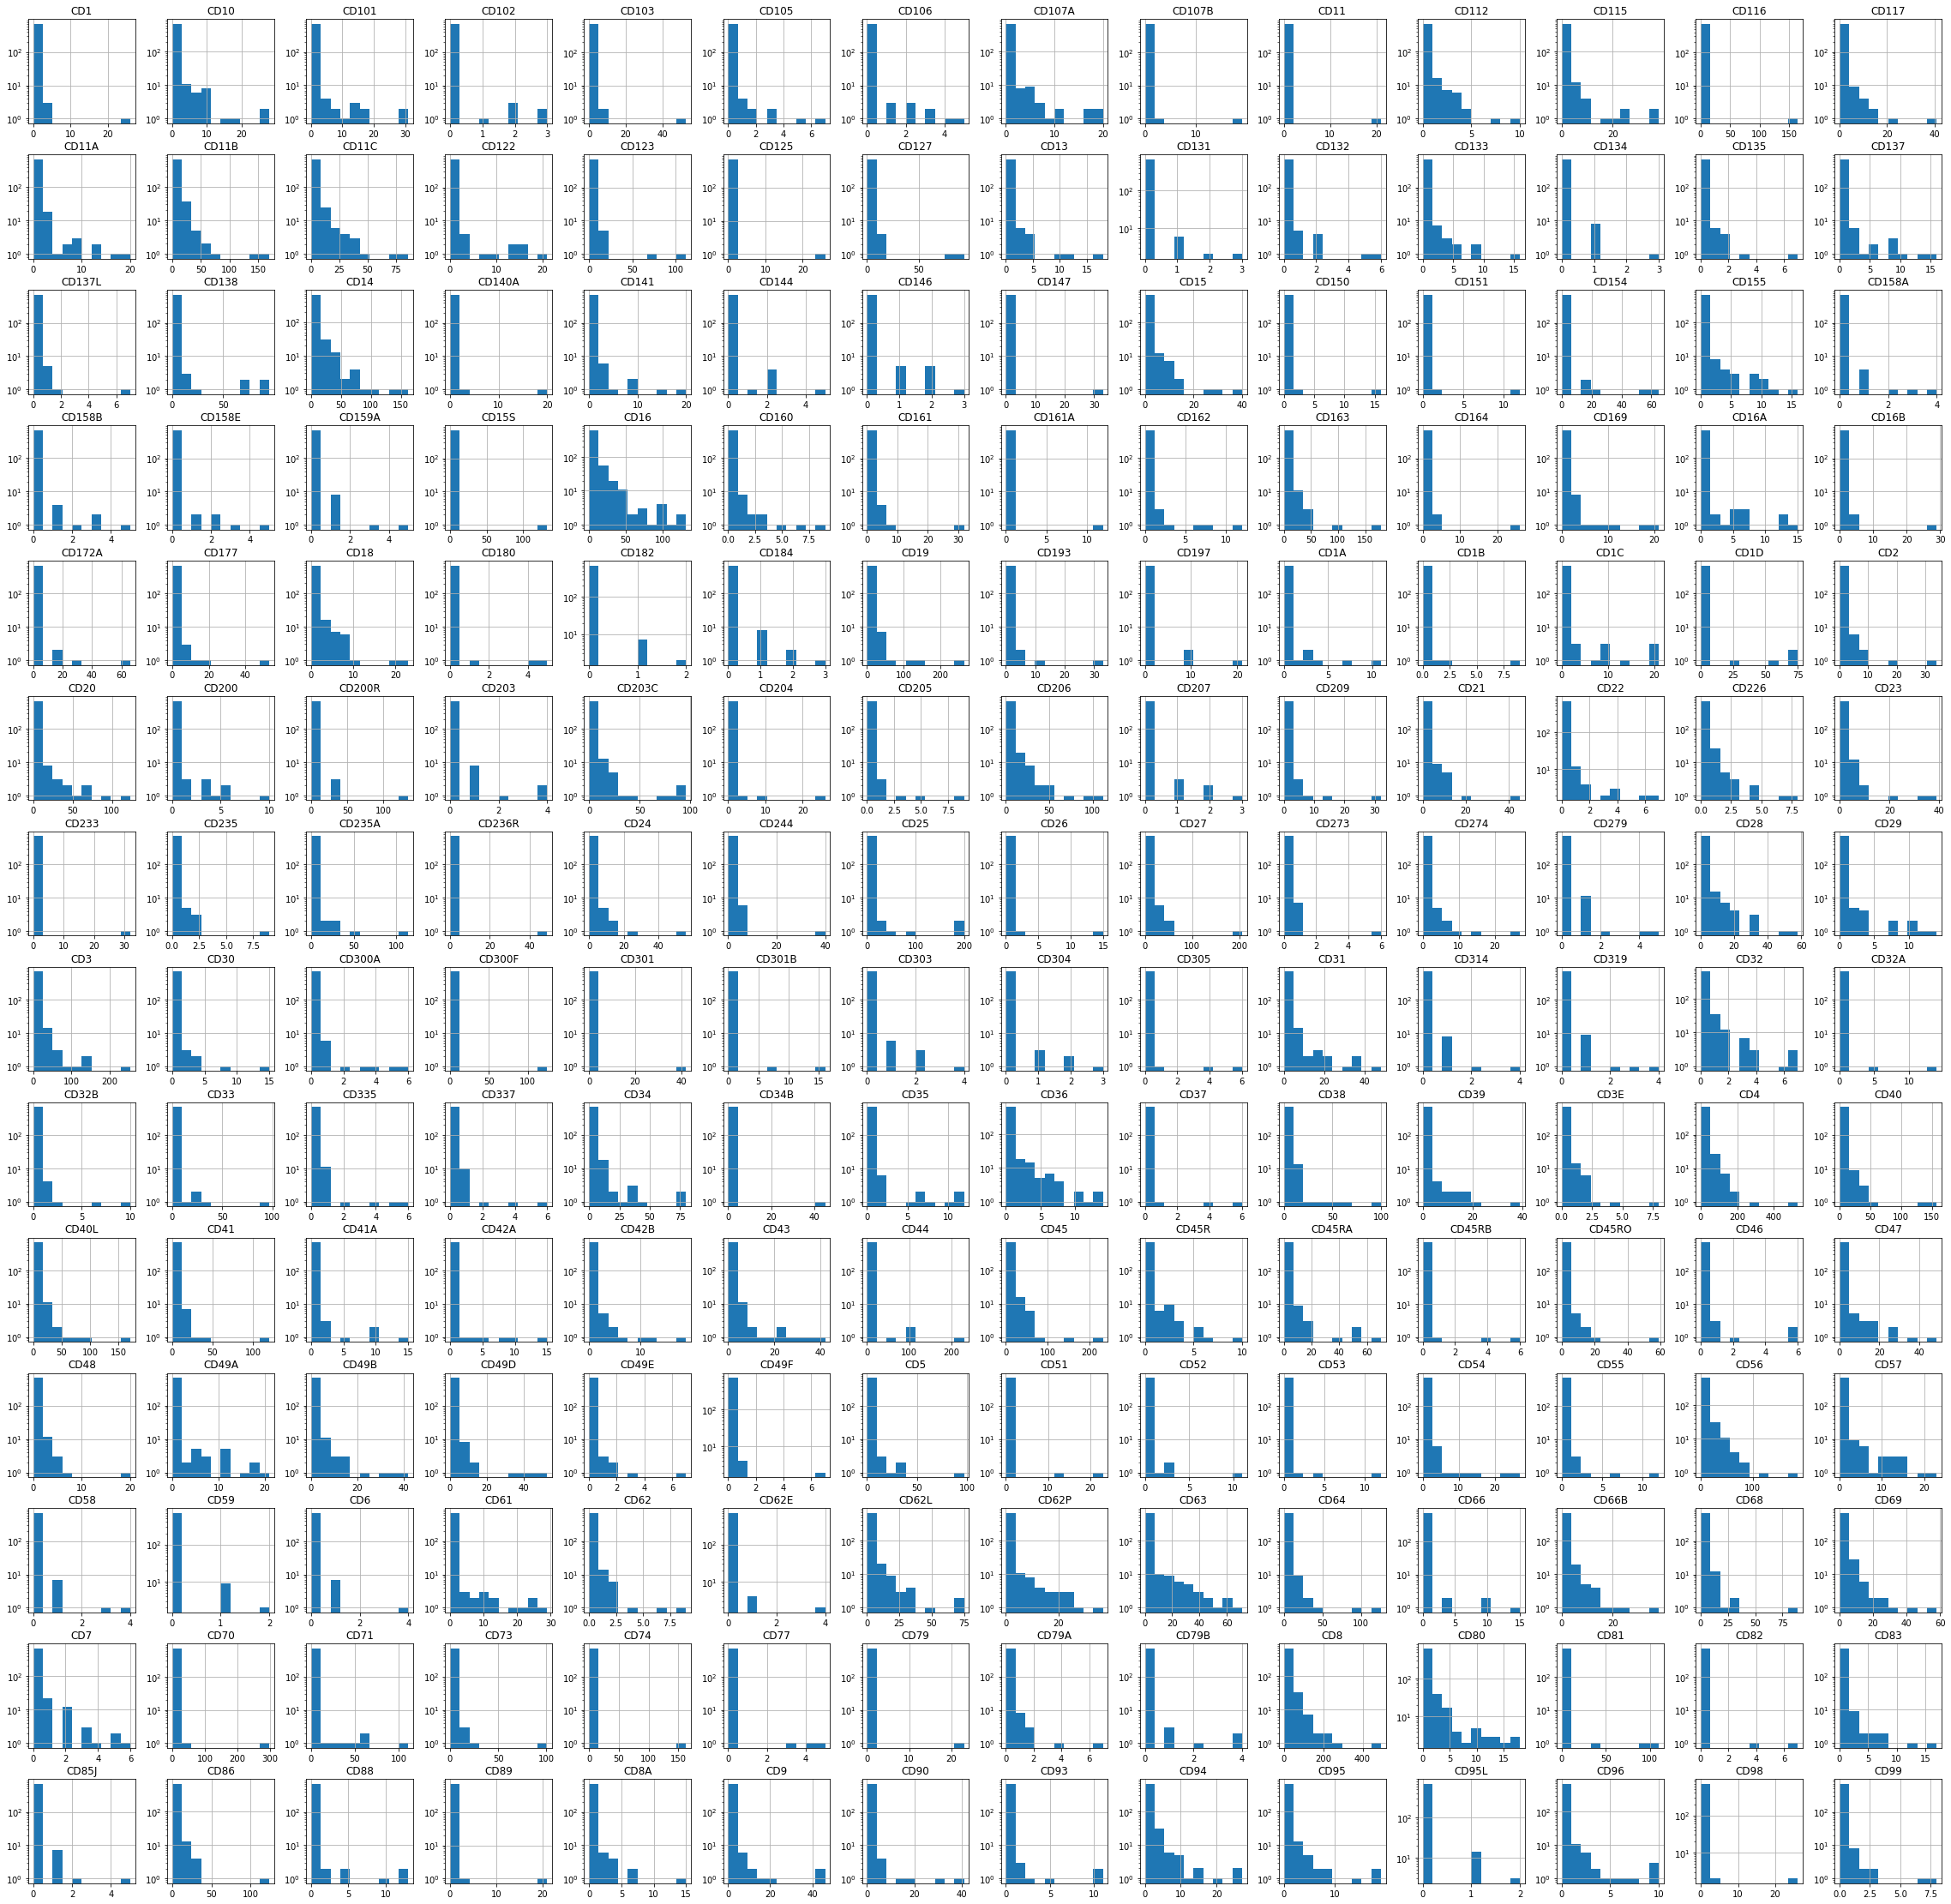

In [20]:
markers_df.hist(figsize=(40, 40),histtype='stepfilled',bins=10,log=True);

---

The graphs show a strong **shift of data to the left and a prevalence of zero values**. This is a normal situation, since each individual article deals with only a limited list of markers, the rest automatically fall into the category of missing ones.

Due to such a feature of the data as the prevalence of zero values, I will consider them sparse. Therefore, I will use **"MaxAbsScaler"** as a data preprocessing tool, as it is well **suited for sparse data**.

---

In [21]:
transform_markers = MaxAbsScaler().fit(markers_df)

In [22]:
transf_markers_df=pd.DataFrame(transform_markers.transform(markers_df),columns=markers_df.columns)
transf_markers_df

,CD1,CD10,CD101,CD102,CD103,CD105,CD106,CD107A,CD107B,CD11,CD112,CD115,CD116,CD117,CD11A,CD11B,CD11C,CD122,CD123,CD125,CD127,CD13,CD131,CD132,CD133,CD134,CD135,CD137,CD137L,CD138,CD14,CD140A,CD141,CD144,CD146,CD147,CD15,CD150,CD151,CD154,CD155,CD158A,CD158B,CD158E,CD159A,CD15S,CD16,CD160,CD161,CD161A,CD162,CD163,CD164,CD169,CD16A,CD16B,CD172A,CD177,CD18,CD180,CD182,CD184,CD19,CD193,CD197,CD1A,CD1B,CD1C,CD1D,CD2,CD20,CD200,CD200R,CD203,CD203C,CD204,CD205,CD206,CD207,CD209,CD21,CD22,CD226,CD23,CD233,CD235,CD235A,CD236R,CD24,CD244,CD25,CD26,CD27,CD273,CD274,CD279,CD28,CD29,CD3,CD30,CD300A,CD300F,CD301,CD301B,CD303,CD304,CD305,CD31,CD314,CD319,CD32,CD32A,CD32B,CD33,CD335,CD337,CD34,CD34B,CD35,CD36,CD37,CD38,CD39,CD3E,CD4,CD40,CD40L,CD41,CD41A,CD42A,CD42B,CD43,CD44,CD45,CD45R,CD45RA,CD45RB,CD45RO,CD46,CD47,CD48,CD49A,CD49B,CD49D,CD49E,CD49F,CD5,CD51,CD52,CD53,CD54,CD55,CD56,CD57,CD58,CD59,CD6,CD61,CD62,CD62E,CD62L,CD62P,CD63,CD64,CD66,CD66B,CD68,CD69,CD7,CD70,CD71,CD73,CD74,CD77,CD79,CD79A,CD79B,CD8,CD80,CD81,CD82,CD83,CD85J,CD86,CD88,CD89,CD8A,CD9,CD90,CD93,CD94,CD95,CD95L,CD96,CD98,CD99
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.184211,0.000000,0.00000,0.0,0.218935,0.023256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.037879,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.011321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.027559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001883,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.124260,0.162791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007576,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.01227,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.271605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.318182,0.0,0.0,0.0,1.0,0.03352,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.019685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.857143,0.0,0.0,0.000000,0.333333,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.761905,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.716981,0.0,0.

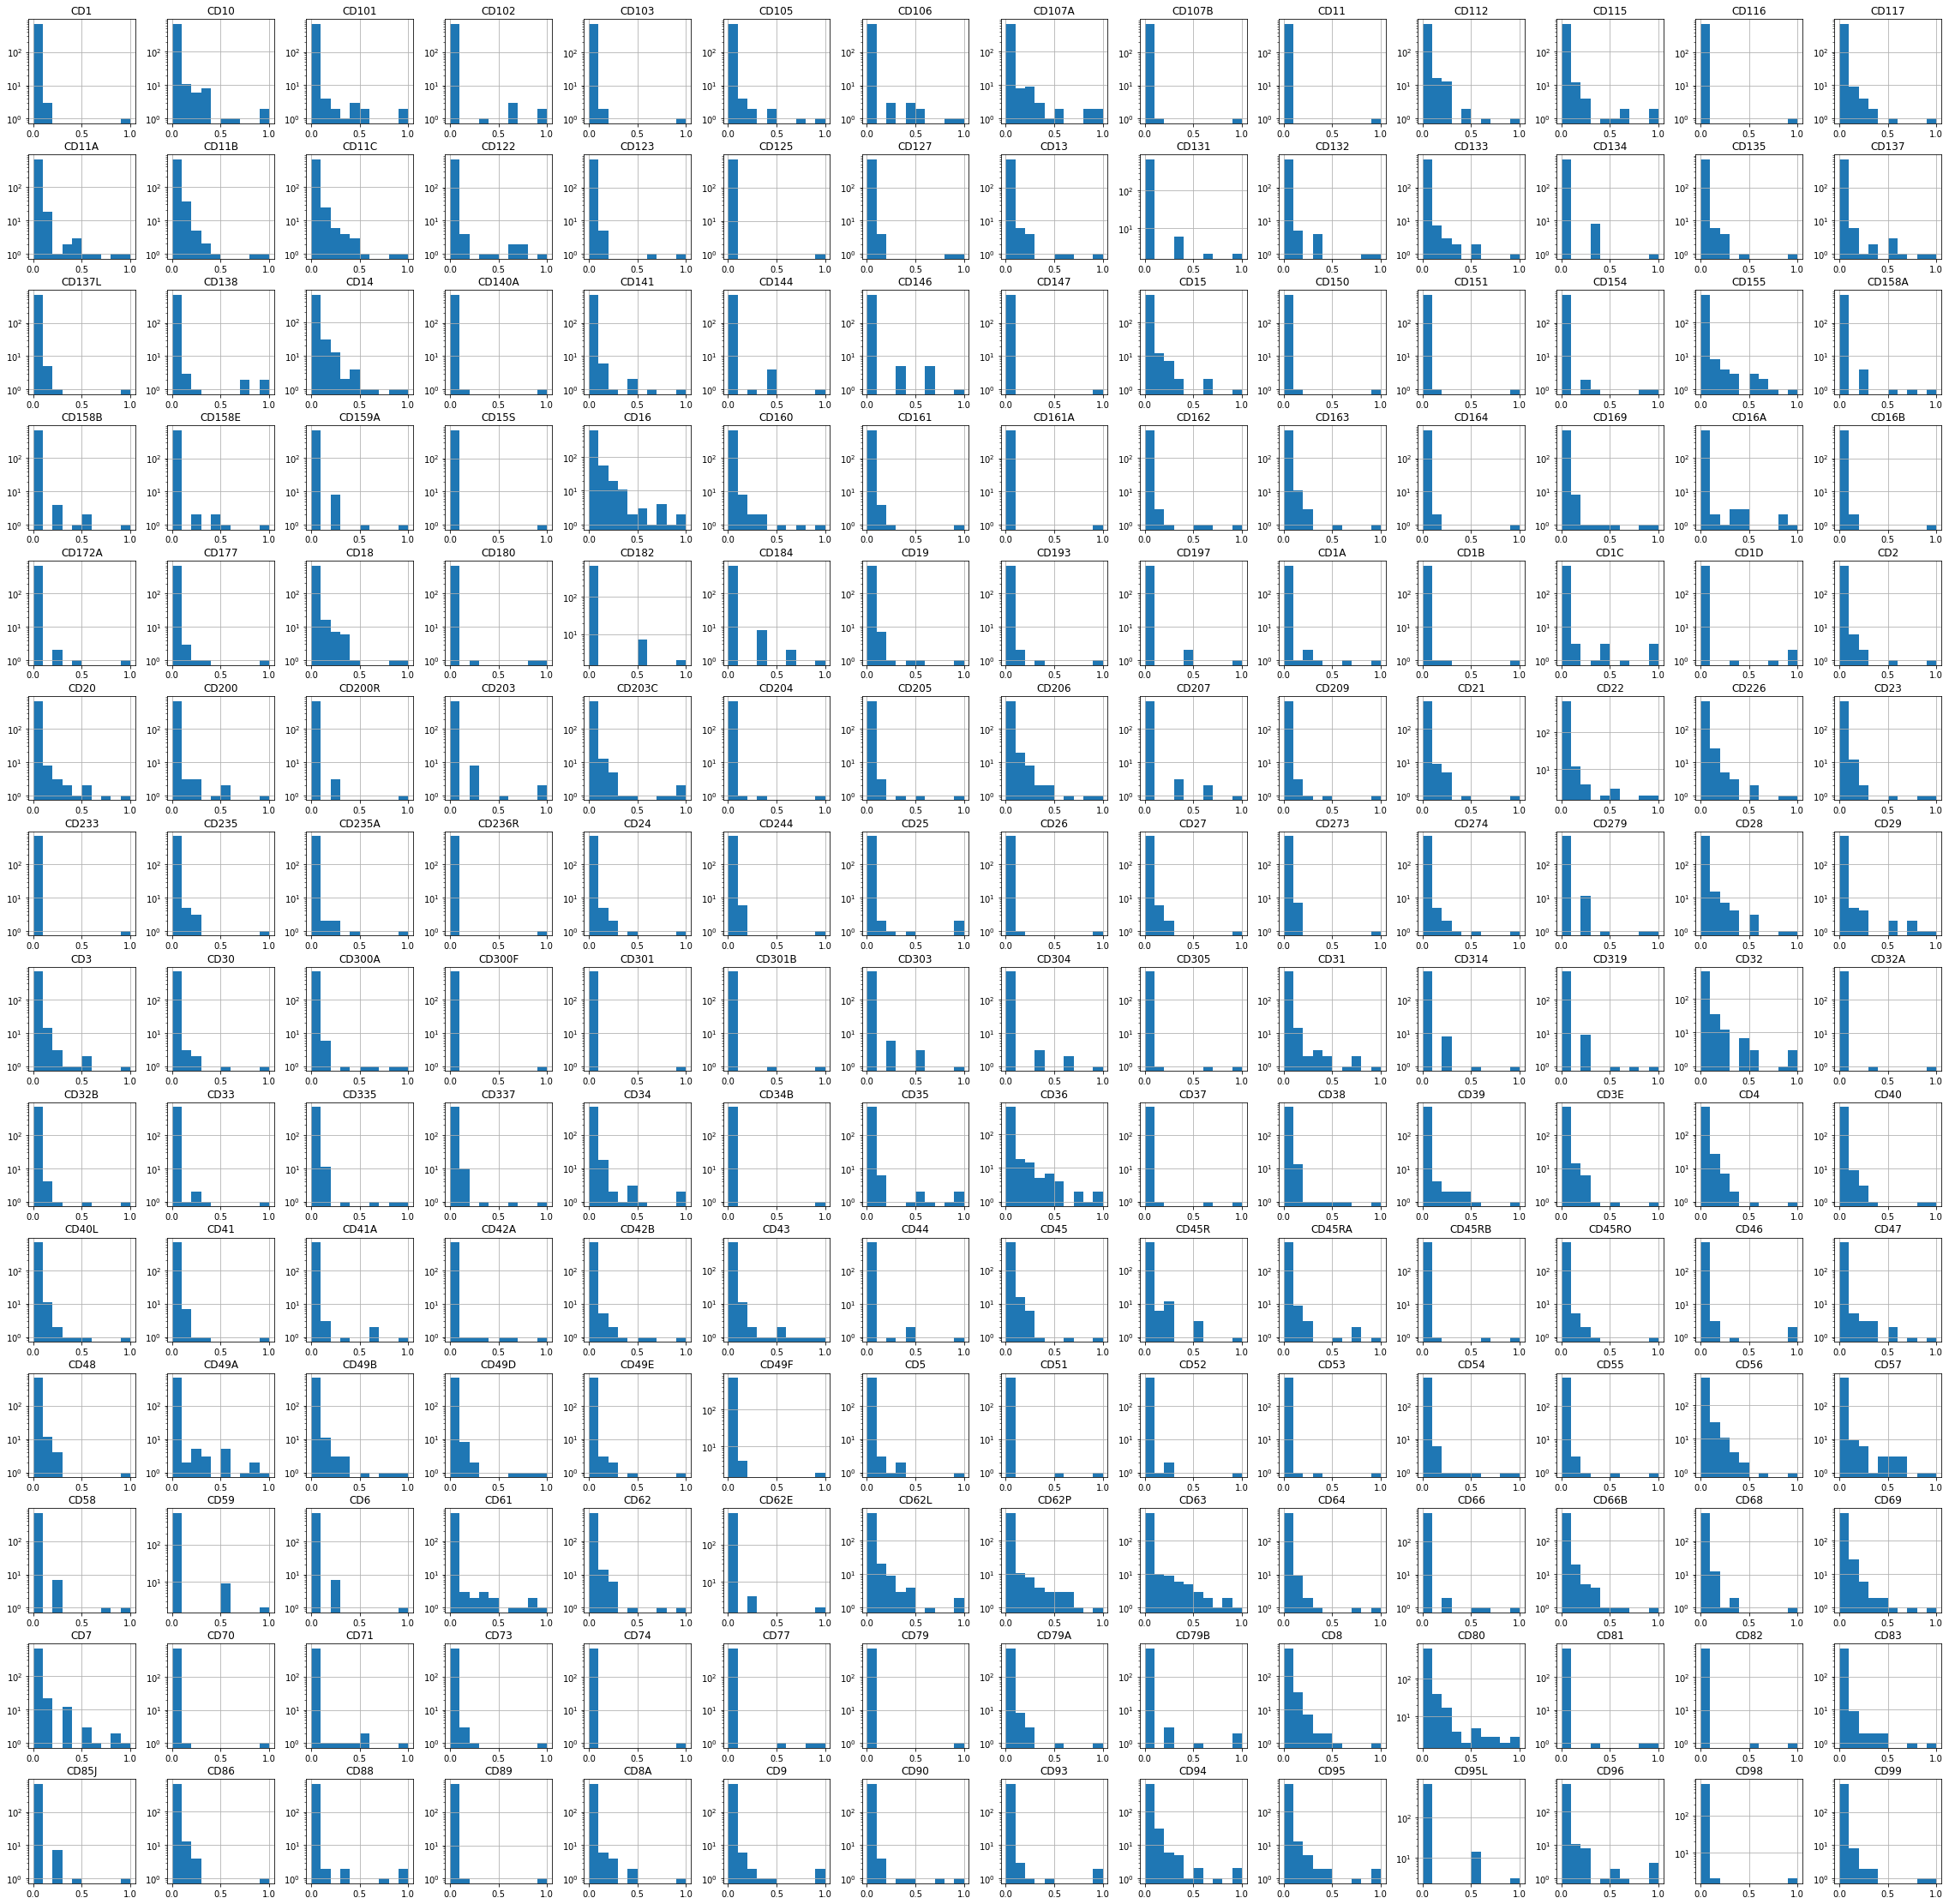

In [23]:
transf_markers_df.hist(figsize=(40, 40),histtype='stepfilled',bins=10,log=True);

---

As we can see, the data **distribution has not changed** after this procedure.

Now let's work with the table, where the **number of mentions of cells per article** is counted.  
I decided to **define discrete classes** that indicate whether the article is about a particular cell line or not. To do this, I will carry out two sequential procedures with the data:

- Firstly, I will **normalize the data** to be able to set a general threshold for determining the prevalent cell line in the article.

- Secondly, I will **binarize the data**, that is, I will declare all values below the threshold as negative, and above as positive.

---

In [24]:
normalize_cells=Normalizer().fit(cells_df)
norm_cells_df=pd.DataFrame(normalize_cells.transform(cells_df),columns=cells_df.columns)
norm_cells_df

,Monocyte,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte,Platelet
0,0.998470,0.000000,0.000000,0.0,0.002903,0.0,0.000000,0.055148,0.002903,0.000000
1,0.993128,0.000000,0.000000,0.0,0.009458,0.0,0.000000,0.116653,0.000000,0.000000
2,0.999913,0.000000,0.007299,0.0,0.000000,0.0,0.000000,0.010948,0.000000,0.000000
3,0.999924,0.000000,0.000000,0.0,0.011049,0.0,0.000000,0.005524,0.000000,0.000000
4,0.997776,0.000000,0.000000,0.0,0.065582,0.0,0.000000,0.011711,0.002342,0.000000
...,...,...,...,...,...,...,...,...,...,...
703,0.135258,0.000000,0.000000,0.0,0.063651,0.0,0.000000,0.015913,0.063651,0.986585
704,0.000000,0.016804,0.000000,0.0,0.000000,0.0,0.000000,0.008402,0.999824,0.000000
705,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.285714,0.000000,0.857143,0.428571
706,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000


In [25]:
binarize_cells = Binarizer(threshold=0.68).fit(norm_cells_df)
bin_cells_df=pd.DataFrame(binarize_cells.transform(norm_cells_df),columns=cells_df.columns)
bin_cells_df

,Monocyte,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte,Platelet
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
bin_cells_df.T.sum().sort_values()[:10]

528    0.0
599    0.0
590    0.0
511    0.0
560    0.0
465    1.0
466    1.0
467    1.0
468    1.0
469    1.0
dtype: float64

In [27]:
bin_cells_df.T.sum().sort_values()[-10:]

235    1.0
236    1.0
237    1.0
238    1.0
231    1.0
543    2.0
569    2.0
85     2.0
576    2.0
707    2.0
dtype: float64

---

Let's see what happened. **For most articles, the prevalent cell line was unambiguously identified**. However, **some articles turned out to be "double positive"** and **some were completely "negative"**. Why did this happen? Let's take a look at some of the "negative" and "double positive" articles.

---

In [28]:
cells_df.iloc[511].to_frame(name='value')

,value
Monocyte,0
T_lymphocyte,0
B_lymphocyte,5
Natural_Killer,0
Neutrophil,0
Eosinophil,0
Basophil,0
Macrophage,5
Erythrocyte,1
Platelet,2


---

Let's display the **number of mentions of cells in one of the "negative" articles**. It is noticeable that the **values are very small** and it is difficult to choose the prevalent cell line from them.

---

In [29]:
cells_df.iloc[85].to_frame(name='value')

,value
Monocyte,209
T_lymphocyte,0
B_lymphocyte,0
Natural_Killer,0
Neutrophil,0
Eosinophil,0
Basophil,0
Macrophage,209
Erythrocyte,0
Platelet,0


---

And here is one of the **"double positive" articles**. **Two cell lines prevail in it at once**, and it is not possible to choose the main one from them.

For comparison, I will give the distribution in one of the **articles, where the prevalent cell line was determined unambiguously**:

---

In [30]:
cells_df.iloc[468].to_frame(name='value')

,value
Monocyte,1
T_lymphocyte,8
B_lymphocyte,62
Natural_Killer,0
Neutrophil,0
Eosinophil,5
Basophil,1
Macrophage,6
Erythrocyte,0
Platelet,4


In [31]:
bin_cells_df.iloc[468]

Monocyte          0.0
T_lymphocyte      0.0
B_lymphocyte      1.0
Natural_Killer    0.0
Neutrophil        0.0
Eosinophil        0.0
Basophil          0.0
Macrophage        0.0
Erythrocyte       0.0
Platelet          0.0
Name: 468, dtype: float64

---

Okay, let's move on.

Right now I will not change the thresholds to fix this situation, but **then we will see how this will affect the quality of the model training**.

Let's **prepare the training and test data**.  
I decided to **test three different classifiers**, the description of which says that they are suitable for sparse data and for working with several classes at the same time.

---

In [32]:
X=transf_markers_df
y=bin_cells_df

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=100)

In [34]:
X_train_for_regr=X_train.to_numpy()
X_test_for_regr=X_test.to_numpy()
y_train_for_regr=y_train.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()
y_test_for_regr=y_test.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()

---

**LogisticRegressionCV** and **LinearSVC** take arrays as input an array-like matrix of shape (n_samples, n_features) as X and class-coded array of shape (n_samples,) as y.

Naive Bayes classifier (**MultinomialNB**) is suitable for classification with discrete features with integer feature counts. Therefore, I will try to use input data without preprocessing for classification (as X).

---

In [35]:
X_NB=markers_df.reset_index().drop('article_id',axis=1)
y_NB=bin_cells_df

In [36]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB=train_test_split(X_NB,y_NB,test_size=0.25,train_size=0.75,random_state=100)

In [37]:
X_train_for_bayes=X_train_NB.to_numpy()
X_test_for_bayes=X_test_NB.to_numpy()
y_train_for_bayes=y_train_NB.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()
y_test_for_bayes=y_test_NB.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()

---

Let's **start training** the first classifier.
I want to try to determine some parameters **using GridSearchCV**.

---

In [38]:
log_reg_clf=LogisticRegressionCV()

In [39]:
parametrs={'Cs':range(8,12),'cv':[5],'solver':['newton-cg','lbfgs','sag','saga'],'max_iter':range(30,100,10),'n_jobs':[-1],'refit':('True','False'),'multi_class':['multinomial'],'random_state':[10]}

In [40]:
grid_search_cv_clf=GridSearchCV(log_reg_clf,parametrs,n_jobs=-1)

In [41]:
grid_search_cv_clf.fit(X_train_for_regr,y_train_for_regr)

GridSearchCV(estimator=LogisticRegressionCV(), n_jobs=-1,
             param_grid={'Cs': range(8, 12), 'cv': [5],
                         'max_iter': range(30, 100, 10),
                         'multi_class': ['multinomial'], 'n_jobs': [-1],
                         'random_state': [10], 'refit': ('True', 'False'),
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [42]:
grid_search_cv_clf.score(X_train_for_regr,y_train_for_regr)

0.8380414312617702

In [43]:
grid_search_cv_clf.best_params_

{'Cs': 10,
 'cv': 5,
 'max_iter': 30,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'random_state': 10,
 'refit': 'True',
 'solver': 'saga'}

In [44]:
best_clf=grid_search_cv_clf.best_estimator_

In [45]:
predictions=best_clf.predict(X_test_for_regr)
precision=precision_score(y_test_for_regr, predictions, average='micro')
precision

0.7344632768361582

---

Using the **parameters selected by GridSearchCV**, the **precision_score value** turned out to be **about 0.73**

Empirically, I find more optimal parameters and slightly **increase the precision_score** value:

---

In [46]:
log_reg_clf_2=LogisticRegressionCV(Cs=11,solver='newton-cg',cv=5,n_jobs=-1,multi_class='multinomial',random_state=10,max_iter=30)
log_reg_clf_2.fit(X_train_for_regr,y_train_for_regr)
log_reg_clf_2.score(X_train_for_regr,y_train_for_regr)

0.9133709981167608

In [47]:
predictions_2=log_reg_clf_2.predict(X_test_for_regr)
precision_2=precision_score(y_test_for_regr, predictions_2, average='micro')
precision_2

0.7457627118644068

---

Now let's see what **results we get with other classifiers**. Since they have few parameters that can be varied, I select them empirically.

---

In [48]:
multi_clf = MultinomialNB(alpha=1.0)
multi_clf.fit(X_train_for_bayes,y_train_for_bayes)
multi_clf.score(X_train_for_bayes,y_train_for_bayes)

0.8173258003766478

In [49]:
predictions_3=multi_clf.predict(X_test_for_bayes)
precision_3=precision_score(y_test_for_bayes, predictions_3, average='micro')
precision_3

0.751412429378531

In [50]:
svm_line_clf = LinearSVC(C=3.0,random_state=10)
svm_line_clf.fit(X_train_for_regr,y_train_for_regr)
svm_line_clf.score(X_train_for_regr,y_train_for_regr)

0.8738229755178908

In [51]:
predictions_4=svm_line_clf.predict(X_test_for_regr)
precision_4=precision_score(y_test_for_regr, predictions_4, average='micro')
precision_4

0.751412429378531

---

As we can see, the **precision_score value for all three classifiers turned out to be similar, about 0.75**. Let's see what **predictions** came out in these three cases.

---

In [52]:
true_answers=pd.DataFrame(y_test_for_regr,columns=['y_test'],index=y_test.index)

In [53]:
line_regr_prediction=pd.DataFrame(predictions_2,columns=['pred_class_1'],index=y_test.index)

In [54]:
multi_NB_prediction=pd.DataFrame(predictions_3,columns=['pred_class_2'],index=y_test.index)

In [55]:
svm_linear_prediction=pd.DataFrame(predictions_4,columns=['pred_class_3'],index=y_test.index)

In [56]:
total_predictions=true_answers.join(line_regr_prediction).join(multi_NB_prediction).join(svm_linear_prediction)
total_predictions

,y_test,pred_class_1,pred_class_2,pred_class_3
569,5,4,4,4
474,3,3,3,3
613,10,10,10,10
152,5,5,5,8
566,4,4,4,4
...,...,...,...,...
333,8,8,8,8
218,7,7,7,7
278,7,7,7,7
581,4,4,4,4


---

If we carefully study this table, we will **notice that there are samples (articles) for which all three classifiers are wrong in the same way**. It will be interesting to look at these samples in more detail in order to **understand the cause of the errors**.

---

In [57]:
mistakes_points=total_predictions.query('y_test!=pred_class_1 and y_test!=pred_class_2 and y_test!=pred_class_3 ').astype('int')
mistakes_points.groupby('y_test').apply(display)

,y_test,pred_class_1,pred_class_2,pred_class_3
590,1,4,4,4
599,1,4,4,4
560,1,4,4,4
656,1,8,8,8
42,1,5,5,5
511,1,3,3,3
459,1,7,7,7


,y_test,pred_class_1,pred_class_2,pred_class_3
408,2,5,6,5
402,2,3,5,3
533,2,4,4,4


,y_test,pred_class_1,pred_class_2,pred_class_3
510,3,2,2,2
494,3,2,2,2
509,3,10,10,10
493,3,2,2,2
467,3,2,2,2


,y_test,pred_class_1,pred_class_2,pred_class_3
540,4,8,8,8


,y_test,pred_class_1,pred_class_2,pred_class_3
569,5,4,4,4
157,5,3,3,3
114,5,2,3,2
149,5,6,1,6
133,5,2,2,2
160,5,1,1,1
104,5,6,6,6


,y_test,pred_class_1,pred_class_2,pred_class_3
193,6,5,1,1
200,6,5,4,5
189,6,2,2,2
197,6,2,2,2
195,6,8,5,5


,y_test,pred_class_1,pred_class_2,pred_class_3
259,7,3,3,3
265,7,6,6,2


,y_test,pred_class_1,pred_class_2,pred_class_3
54,8,1,5,1
512,8,3,3,3
307,8,3,1,1


,y_test,pred_class_1,pred_class_2,pred_class_3
609,9,8,8,8


""


---

I suggested that the **reason** could be as follows: in the case when all classifiers point to the same class, and the correct answer is different, perhaps the **combination of markers indicates one type of cell, and the mention of cell names indicates another type**.

To test this hypothesis, let's **look at the features** (i.e. markers) that **strongest influence** on the classification decision. Consider the example of Logistic Regression classifier.

---

In [58]:
log_regr_coeff=log_reg_clf_2.coef_
log_regr_coeff

array([[ 0.17645727, -1.72888864, -1.01242726, ...,  0.45921839,
         1.92414174,  3.45117486],
       [-0.57257063, -1.50101377, -0.57696909, ..., -1.42703415,
        -0.66501623, -0.52844445],
       [ 0.76021976, -2.19748748, -1.75139088, ...,  0.08502885,
        -0.87798568, -0.50690946],
       ...,
       [-2.94531074, -1.34226086, -1.11239581, ..., -1.00849466,
        -0.59230176, -0.57878668],
       [-0.9732249 , -1.16417414, -0.94369079, ...,  2.23515982,
        -0.82362672, -1.9816681 ],
       [-0.07283331, -0.74376007, -0.44214617, ..., -0.55072904,
         2.88713904,  0.66232778]])

In [59]:
classes=['Monocyte','Platelet','T_lymphocyte','B_lymphocyte','Natural_Killer','Neutrophil','Eosinophil','Basophil','Macrophage','Erythrocyte']

In [60]:
importance_of_markers=pd.DataFrame(log_regr_coeff,columns=X_test.columns,index=classes).T.reset_index().rename(columns={'index':'markers'})
importance_of_markers

,markers,Monocyte,Platelet,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte
0,CD1,0.176457,-0.572571,0.760220,-0.292223,-0.037418,5.094017,-1.137112,-2.945311,-0.973225,-0.072833
1,CD10,-1.728889,-1.501014,-2.197487,6.585566,-0.874654,6.356069,-3.389396,-1.342261,-1.164174,-0.743760
2,CD101,-1.012427,-0.576969,-1.751391,-1.117838,-0.690108,0.268794,7.378173,-1.112396,-0.943691,-0.442146
3,CD102,0.972110,0.812355,0.356405,-0.148885,-0.189632,-0.826367,-0.509895,-0.220294,-0.168661,-0.077137
4,CD103,-0.287244,-0.522763,0.980852,-1.132471,-0.880370,0.713704,1.040253,-1.136193,1.685232,-0.461001
...,...,...,...,...,...,...,...,...,...,...,...
191,CD95,-0.911279,-0.768619,1.377249,0.953922,-1.066007,3.463305,-1.352227,-0.822179,-0.487033,-0.387133
192,CD95L,-3.949337,-0.678872,1.010046,-0.810528,2.110873,0.385057,-1.808793,-0.654560,4.760195,-0.364081
193,CD96,0.459218,-1.427034,0.085029,-0.843507,2.829586,-0.869380,-0.909848,-1.008495,2.235160,-0.550729
194,CD98,1.924142,-0.665016,-0.877986,-0.564004,0.113597,-0.614380,-0.787564,-0.592302,-0.823627,2.887139


---

The **larger positive coefficient** - the **more influence of the feature on the assignment of the sample to this class**

The **larger negative coefficient** (abs) - the **more influence of the feature on** ***NOT*** **assignment to this class**

Let's look at the "positive" and "negative" influence of different features on the graphs:

---

<AxesSubplot:xlabel='Platelet', ylabel='markers'>

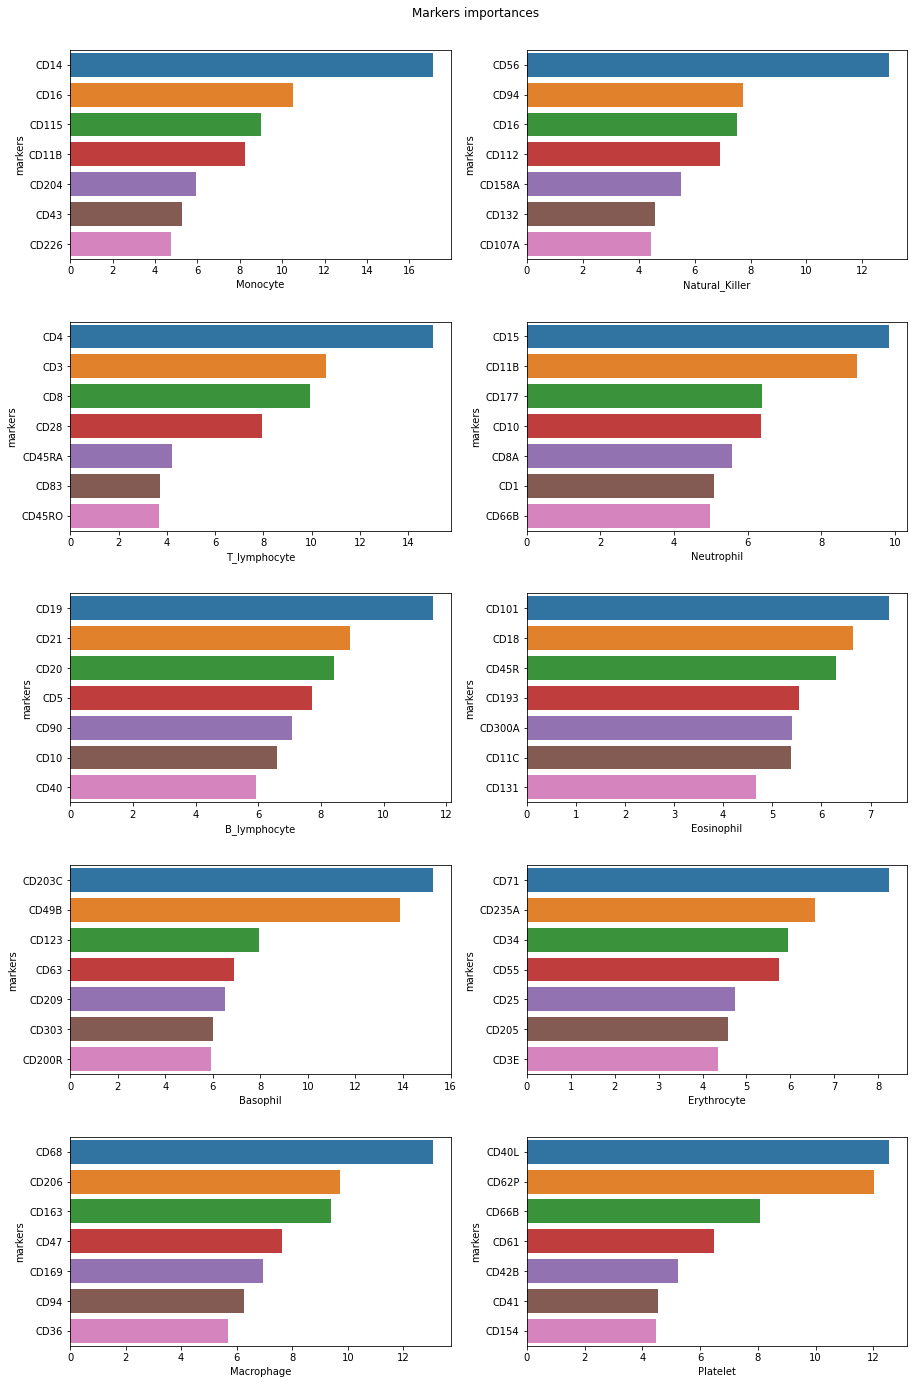

In [61]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
plt.subplots_adjust(left=0.125, bottom=0.05, right=0.9, top=0.95, wspace=0.2, hspace=0.3)
fig.suptitle('Markers importances')
sns.barplot(ax=axes[0, 0], data=importance_of_markers.sort_values('Monocyte',ascending=False)[:7], x='Monocyte', y='markers')
sns.barplot(ax=axes[1, 0], data=importance_of_markers.sort_values('T_lymphocyte',ascending=False)[:7], x='T_lymphocyte', y='markers')
sns.barplot(ax=axes[2, 0], data=importance_of_markers.sort_values('B_lymphocyte',ascending=False)[:7], x='B_lymphocyte', y='markers')
sns.barplot(ax=axes[0, 1], data=importance_of_markers.sort_values('Natural_Killer',ascending=False)[:7], x='Natural_Killer', y='markers')
sns.barplot(ax=axes[1, 1], data=importance_of_markers.sort_values('Neutrophil',ascending=False)[:7], x='Neutrophil', y='markers')
sns.barplot(ax=axes[2, 1], data=importance_of_markers.sort_values('Eosinophil',ascending=False)[:7], x='Eosinophil', y='markers')
sns.barplot(ax=axes[3, 0], data=importance_of_markers.sort_values('Basophil',ascending=False)[:7], x='Basophil', y='markers')
sns.barplot(ax=axes[4, 0], data=importance_of_markers.sort_values('Macrophage',ascending=False)[:7], x='Macrophage', y='markers')
sns.barplot(ax=axes[3, 1], data=importance_of_markers.sort_values('Erythrocyte',ascending=False)[:7], x='Erythrocyte', y='markers')
sns.barplot(ax=axes[4, 1], data=importance_of_markers.sort_values('Platelet',ascending=False)[:7], x='Platelet', y='markers')

<AxesSubplot:xlabel='Platelet', ylabel='markers'>

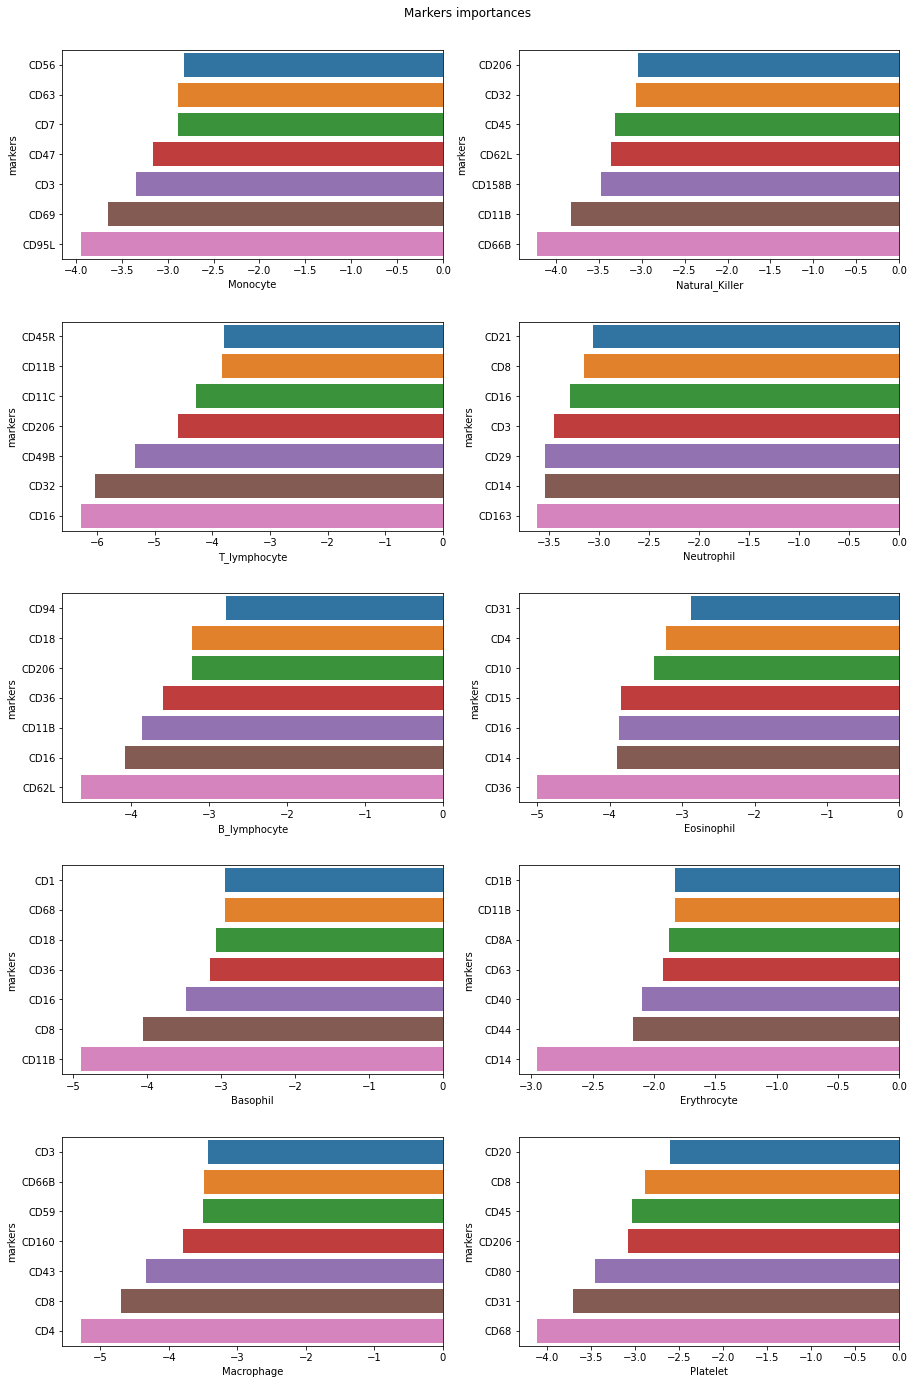

In [62]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
plt.subplots_adjust(left=0.125, bottom=0.05, right=0.9, top=0.95, wspace=0.2, hspace=0.3)
fig.suptitle('Markers importances')
sns.barplot(ax=axes[0, 0], data=importance_of_markers.sort_values('Monocyte',ascending=False)[-7:], x='Monocyte', y='markers')
sns.barplot(ax=axes[1, 0], data=importance_of_markers.sort_values('T_lymphocyte',ascending=False)[-7:], x='T_lymphocyte', y='markers')
sns.barplot(ax=axes[2, 0], data=importance_of_markers.sort_values('B_lymphocyte',ascending=False)[-7:], x='B_lymphocyte', y='markers')
sns.barplot(ax=axes[0, 1], data=importance_of_markers.sort_values('Natural_Killer',ascending=False)[-7:], x='Natural_Killer', y='markers')
sns.barplot(ax=axes[1, 1], data=importance_of_markers.sort_values('Neutrophil',ascending=False)[-7:], x='Neutrophil', y='markers')
sns.barplot(ax=axes[2, 1], data=importance_of_markers.sort_values('Eosinophil',ascending=False)[-7:], x='Eosinophil', y='markers')
sns.barplot(ax=axes[3, 0], data=importance_of_markers.sort_values('Basophil',ascending=False)[-7:], x='Basophil', y='markers')
sns.barplot(ax=axes[4, 0], data=importance_of_markers.sort_values('Macrophage',ascending=False)[-7:], x='Macrophage', y='markers')
sns.barplot(ax=axes[3, 1], data=importance_of_markers.sort_values('Erythrocyte',ascending=False)[-7:], x='Erythrocyte', y='markers')
sns.barplot(ax=axes[4, 1], data=importance_of_markers.sort_values('Platelet',ascending=False)[-7:], x='Platelet', y='markers')

---

It's nice to see that the **features that have the strongest "positive"** effect on sample classification **correlate with typical markers** of the explored blood cell types :)

Ok, let's finally look at exactly **what factors influenced the error rate** in the classification.

Let's **go back to the moment of data binarization**, when, after applying a certain threshold, **some of the articles turned out to be completely "negative"**, as if they did not talk about any of the cell types. **Another part of the articles turned out to be "double positive"**, that is, they dealt with two types of cells at the same time, and neither of them would be prevalent.

---

In [64]:
bin_cells_df.T.sum().sort_values()

528    0.0
599    0.0
590    0.0
511    0.0
560    0.0
      ... 
543    2.0
569    2.0
85     2.0
576    2.0
707    2.0
Length: 708, dtype: float64

---

At that moment, when I **divided the data into X (feats) y (classes)**, those **articles where none of the classes was defined as positive** were automatically **assigned to class "1"**, which is obviously wrong. Therefore, it is not surprising that when trying to predict cell type based on cell markers, the predicted type rarely matches "1".

---

In [73]:
total_predictions.loc[560]

y_test          1
pred_class_1    4
pred_class_2    4
pred_class_3    4
Name: 560, dtype: object

In [77]:
y_test.loc[560]

Monocyte          0.0
T_lymphocyte      0.0
B_lymphocyte      0.0
Natural_Killer    0.0
Neutrophil        0.0
Eosinophil        0.0
Basophil          0.0
Macrophage        0.0
Erythrocyte       0.0
Platelet          0.0
Name: 560, dtype: float64

---

In the **case of "double positive" articles**, the situation was different: in the y-array, **only the first occurrence**, that is, only one of the prevalent classes, **was taken as a proper class**. It also added inaccuracy to the prediction.

---

In [101]:
total_predictions.loc[569]

Monocyte          0.0
T_lymphocyte      0.0
B_lymphocyte      0.0
Natural_Killer    0.0
Neutrophil        1.0
Eosinophil        0.0
Basophil          0.0
Macrophage        1.0
Erythrocyte       0.0
Platelet          0.0
Name: 569, dtype: float64

In [99]:
y_test.loc[569]

Monocyte          0.0
T_lymphocyte      0.0
B_lymphocyte      0.0
Natural_Killer    0.0
Neutrophil        1.0
Eosinophil        0.0
Basophil          0.0
Macrophage        1.0
Erythrocyte       0.0
Platelet          0.0
Name: 569, dtype: float64

---

And finally, **the third important group of errors** is related to the **cell names** from the list. So, for example, ***"Natural Killers"*** in articles are often referred to by an ***abbreviated name - NK***. Similarly, other **cell type names may have language variations or abbreviations**.

Thus, when counting only full names, the value may turn out to be falsely reduced, and this will affect the correct choice of the class for the input data when training the model.

---

## So,

***How can we increase the proportion of correct predictions in this situation?***

- Firstly, we can **collect more data**, including **variations in cell names**, but also a increase the sample as a whole.

- Secondly, we can set more **stringent thresholds for selecting** "significant" markers or the number of mentions of all markers per article, or the number of mentions of target cell names per article.

- And finally, we can **try other methods** of data preprocessing, test other classifiers, other parameters, and so on.

Or maybe the optimal solution lies somewhere else, who knows...